In [30]:
import pickle

# Load the sorted features from a file
with open('sorted_features.pkl', 'rb') as f:
    sorted_features = pickle.load(f)

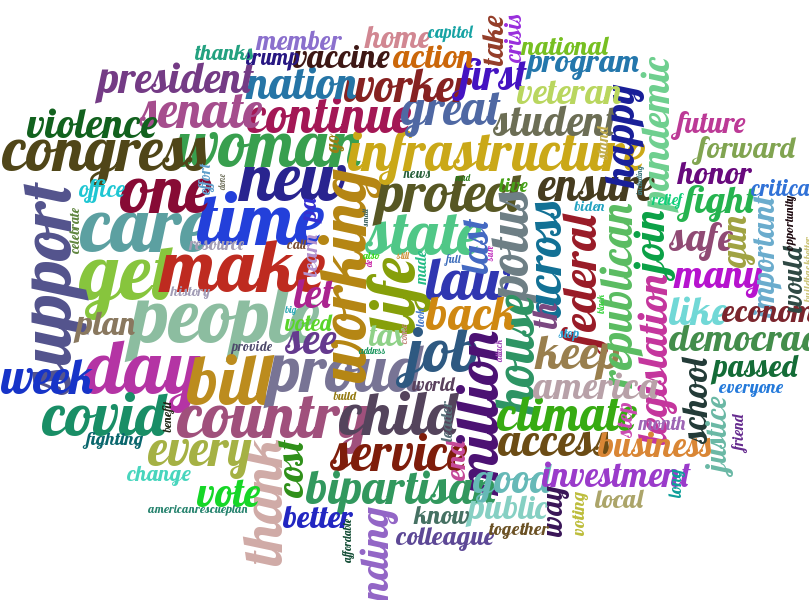

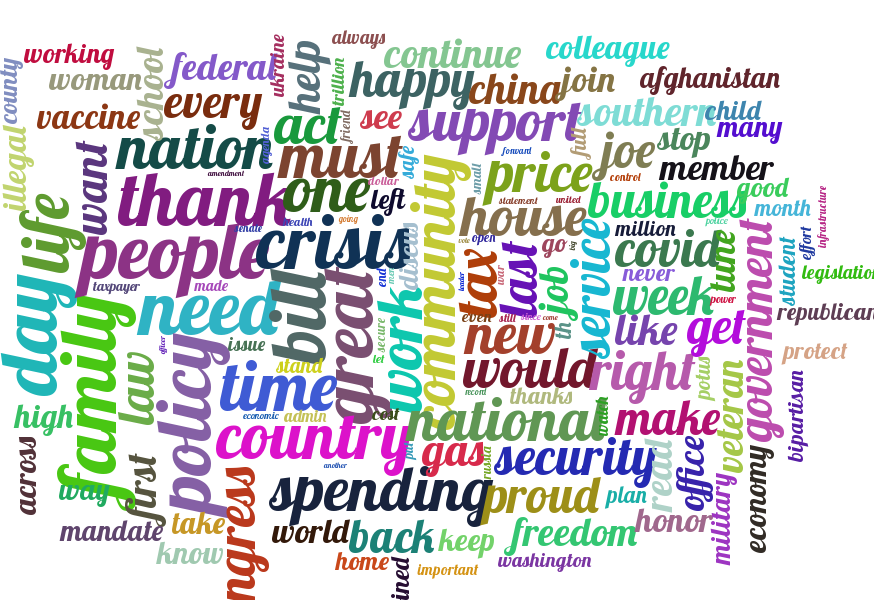

In [35]:
import numpy as np
import math
sorted_features[0]=sorted_features[0][3:]
sorted_features[1]=sorted_features[1][3:]

from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts


def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

for idx, class_features in enumerate(sorted_features):
    # Select the top 50 words
    class_features_top = class_features[:150]

    # Find the min and max values among the top 50 words
    min_value = min(class_features_top, key=lambda x: x[1])[1]
    max_value = max(class_features_top, key=lambda x: x[1])[1]

    # Normalize the log probabilities and scale the word sizes
    class_features_normalized = [(w, normalize(c, min_value, max_value)) for w, c in class_features_top]

    tags = make_tags(class_features_normalized, minsize=8, maxsize=80, scalef=lambda count, mincount, maxcount, minsize, maxsize: int(minsize + (maxsize - minsize) * count))

    # Create a tag cloud image
    create_tag_image(tags, f'wordcloud_class_{idx}.png', size=(900, 600), fontname='Lobster')

    # Display the image
    from IPython.display import Image
    display(Image(filename=f'wordcloud_class_{idx}.png'))
